<a href="https://colab.research.google.com/github/Ganesh7134/Guvi_final_project/blob/main/Twitter_sentiment_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
columns = ["target","id","date","flag","user","text"]
df = pd.read_csv(r"C:\Users\GANESH\streamlit\twitter.csv",names = columns,encoding = "latin-1")
df.head() # names attrbute helps to give heading without effecting the rows

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df["text"]

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

In [ ]:
df["text"].apply(lambda x:len(x)) # to check each tweet length

0          115
1          111
2           89
3           47
4          111
          ... 
1599995     56
1599996     78
1599997     57
1599998     65
1599999     62
Name: text, Length: 1600000, dtype: int64

In [ ]:
df.isnull().sum() # No null values

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [ ]:
df["target"].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [ ]:
df.dtypes

target     int64
id         int64
date      object
flag      object
user      object
text      object
dtype: object

In [ ]:
df["target"].unique() # 4 is positive and 0 is negative

array([0, 4], dtype=int64)

In [ ]:
df["target"].astype("int") # converting float into int

0          0
1          0
2          0
3          0
4          0
          ..
1599995    4
1599996    4
1599997    4
1599998    4
1599999    4
Name: target, Length: 1600000, dtype: int32

* 1 ----> **means positive Tweet**
* 0 ----> **means negative Tweet**

In [ ]:
df["target"] = df["target"].map({4:1,0:0}) # converting 4 to 1 for better analysis

<AxesSubplot:ylabel='target'>

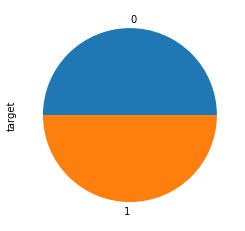

In [ ]:
df["target"].value_counts().plot(kind="pie")

In [ ]:
df.isna().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GANESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
sw = stopwords.words("english")

## **Lemmatizing**

> *to get the meaningful dictionary words from the tweet text*

> **Example**: running ----> run when we are giving pos as V

## **Preprocessing the text**

In [ ]:
import nltk
def preprocessing(text):
    pattern = r"https?://[^\s]+|[^a-zA-Z]"  # Match URLs and non-alphabetic characters
    clean_text = re.sub(pattern, " ", text)
    lower_text = clean_text.lower()
    word_tokenize = nltk.word_tokenize(lower_text)
    stop_words = set(sw)  # Get English stop words
    filtered_tokens = [word for word in word_tokenize if word not in stop_words]  # Filter stop words
    preprocessed_sent = " ".join(filtered_tokens)

    return preprocessed_sent


In [ ]:
df["preprocessed_text"] = df["text"].apply(preprocessing)

In [ ]:
df.head()

,target,id,date,flag,user,text,preprocessed_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww bummer shoulda got david carr ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save re...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\GANESH\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
for i in df["preprocessed_text"][:5]:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
Lz = WordNetLemmatizer()
Lz.lemmatize("running",pos="v")

'run'

In [ ]:
from nltk import word_tokenize, pos_tag, WordNetLemmatizer

# Preprocessing functions
def tokenize(text):
  return word_tokenize(text.lower())

def tag_pos(tokens):
  return pos_tag(tokens)

# Conditional lemmatization based on POS
def conditioned_lemmatize(tagged_tokens):
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = []
  for token, pos in tagged_tokens:
    if pos.startswith("N"):
      lemmatized_tokens.append(lemmatizer.lemmatize(token, "n"))
    elif pos.startswith("V"):
      lemmatized_tokens.append(lemmatizer.lemmatize(token, "v"))
    else:
      lemmatized_tokens.append(token)
  return lemmatized_tokens

# Example usage
text = "The students are studying hard for the exams."

tokens = tokenize(text)
tagged_tokens = tag_pos(tokens)
lemmatized_tokens = conditioned_lemmatize(tagged_tokens)

lemmatized_text = " ".join(lemmatized_tokens)

print(f"Original text: {text}")
print(f"Lemmatized text: {lemmatized_text}")

Original text: The students are studying hard for the exams.
Lemmatized text: the student be study hard for the exam .


In [ ]:
tokens

['the', 'students', 'are', 'studying', 'hard', 'for', 'the', 'exams', '.']

In [ ]:
tagged_tokens

[('the', 'DT'),
 ('students', 'NNS'),
 ('are', 'VBP'),
 ('studying', 'VBG'),
 ('hard', 'RB'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('exams', 'NNS'),
 ('.', '.')]

In [ ]:
lemmatized_tokens

['the', 'student', 'be', 'study', 'hard', 'for', 'the', 'exam', '.']

In [ ]:
Lemmatize_text = []
for i in df["preprocessed_text"]:
    tokens = tokenize(i)
    tagged_tokens = tag_pos(tokens)
    lemmatized_tokens = conditioned_lemmatize(tagged_tokens)
    lemmatized_text = " ".join(lemmatized_tokens)
    Lemmatize_text.append(lemmatized_text)

In [ ]:
df["filtered_text"] = Lemmatize_text

In [ ]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\GANESH\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [ ]:
import nltk
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [ ]:
df.head()

,target,id,date,flag,user,text,preprocessed_text,filtered_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww bummer shoulda got david carr ...,switchfoot awww bummer shoulda get david carr ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save re...,kenichan dive many time ball manage save rest ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see,nationwideclass behaving mad see


In [ ]:
df.isna().sum()

target               0
id                   0
date                 0
flag                 0
user                 0
text                 0
preprocessed_text    0
filtered_text        0
dtype: int64

In [ ]:
print(df['filtered_text'].dtype)

object


In [ ]:
print(df[df['filtered_text'] == ''])

         target          id                          date      flag  \
3997          0  1468720797  Tue Apr 07 03:21:48 PDT 2009  NO_QUERY   
4233          0  1468771833  Tue Apr 07 03:39:06 PDT 2009  NO_QUERY   
5284          0  1469038754  Tue Apr 07 04:57:00 PDT 2009  NO_QUERY   
18950         0  1556733475  Sun Apr 19 00:05:23 PDT 2009  NO_QUERY   
19062         0  1556760319  Sun Apr 19 00:12:56 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1592715       1  2191790700  Tue Jun 16 05:58:39 PDT 2009  NO_QUERY   
1595775       1  2192466848  Tue Jun 16 07:04:51 PDT 2009  NO_QUERY   
1596318       1  2192628378  Tue Jun 16 07:19:07 PDT 2009  NO_QUERY   
1598921       1  2193305981  Tue Jun 16 08:16:39 PDT 2009  NO_QUERY   
1599811       1  2193550913  Tue Jun 16 08:36:39 PDT 2009  NO_QUERY   

                   user                                text preprocessed_text  \
3997         mohdnajwan                         what to do        

In [ ]:
df['filtered_text'] = df['filtered_text'].replace('', 'empty_string_placeholder')

In [ ]:
df["filtered_text"] = df["filtered_text"].astype("str")

In [ ]:
df["filtered_text"]

0          switchfoot awww bummer shoulda get david carr ...
1          upset update facebook texting might cry result...
2          kenichan dive many time ball manage save rest ...
3                            whole body feel itchy like fire
4                           nationwideclass behaving mad see
                                 ...                        
1599995                        woke school best feeling ever
1599996              thewdb com cool hear old walt interview
1599997                       ready mojo makeover ask detail
1599998    happy th birthday boo alll time tupac amaru sh...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: filtered_text, Length: 1600000, dtype: object

In [ ]:
df["target"]

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64

In [ ]:
X = df["filtered_text"].values
Y = df["target"].values

In [ ]:
print(X)

['switchfoot awww bummer shoulda get david carr third day'
 'upset update facebook texting might cry result school today also blah'
 'kenichan dive many time ball manage save rest go bound' ...
 'ready mojo makeover ask detail'
 'happy th birthday boo alll time tupac amaru shakur'
 'happy charitytuesday thenspcc sparkscharity speakinguph h']


In [ ]:
print(Y)

[0 0 0 ... 1 1 1]


## **splitting the data into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 1 , stratify = Y)
# stratify = Y to set equal proportion in splitting

In [ ]:
print(X.shape , x_train.shape , x_test.shape)

(1600000,) (1280000,) (320000,)


In [ ]:
print(x_train)

['rise shin lol min later plan rush door time'
 'nd interview today look promising' 'emilyalbracht feel pain' ...
 'bookwitter welcome change mind though let know'
 'howcoza bet bring backup' 'window linux box instal bsd apple ipod yeah']


In [ ]:
print(x_test)

['would like even little bit time work lay work'
 'look forward keep touch naomi long time since chat'
 'nbatvandre germany nba airtime get international lp watch game sure' ...
 'sweet pea darn think journey like really'
 'oh calvin harris call daft bastard feel cool new claim fame'
 'go family meal hour cheer grandpa']


In [ ]:
# converting textual data into numerical data because model will understand only numerical values
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [ ]:
print(x_train)

  (0, 421112)	0.20391184645508606
  (0, 111869)	0.37207345484230175
  (0, 357295)	0.4147357354057043
  (0, 326607)	0.30664702212081807
  (0, 235327)	0.29259372135705985
  (0, 274678)	0.3402626393408656
  (0, 247162)	0.20984795075497076
  (0, 374746)	0.3962306174717831
  (0, 350895)	0.38925385356088527
  (1, 333845)	0.6675834365650917
  (1, 247959)	0.2884790557402888
  (1, 423500)	0.2543725754111578
  (1, 188817)	0.46238860115941866
  (1, 294666)	0.4388662256538595
  (2, 315232)	0.42078858023901866
  (2, 135871)	0.28224859702045846
  (2, 123689)	0.8621326465344029
  (3, 15764)	0.5380069486962884
  (3, 252600)	0.2959629086063574
  (3, 138054)	0.20568758127704762
  (3, 172812)	0.36429163587977004
  (3, 15741)	0.18165672914425915
  (3, 131651)	0.3743995056775965
  (3, 156023)	0.13139492296939503
  (3, 386431)	0.29370620136198583
  :	:
  (1279995, 46830)	0.4957654835960133
  (1279995, 174570)	0.3901145320213933
  (1279995, 423767)	0.3747208410791963
  (1279995, 15741)	0.24606876315859158
  

In [ ]:
print(x_test)

  (0, 458946)	0.3093527203769917
  (0, 458397)	0.4803045152674296
  (0, 421112)	0.2564368653577736
  (0, 244683)	0.3372151048703212
  (0, 241999)	0.24316310660808227
  (0, 236895)	0.44460745107157024
  (0, 129745)	0.3231931416618199
  (0, 45014)	0.3645225443795792
  (1, 426340)	0.36788389018461143
  (1, 421112)	0.20865269648040885
  (1, 379054)	0.3028776028389286
  (1, 292597)	0.5440996678438579
  (1, 247959)	0.2333246354783554
  (1, 247722)	0.27452604592934865
  (1, 220375)	0.2781427483645791
  (1, 142713)	0.3155126128168358
  (1, 70687)	0.3558506316080113
  (2, 449138)	0.16540654709011388
  (2, 401723)	0.2010606027490293
  (2, 294454)	0.4841189819199358
  (2, 294439)	0.3267497609060592
  (2, 250649)	0.37551308145969076
  (2, 188655)	0.334364481243838
  (2, 152265)	0.11499894561655925
  (2, 152105)	0.2878254360449475
  :	:
  (319996, 182077)	0.6088333839333704
  (319997, 418307)	0.23616173544098823
  (319997, 403337)	0.3461564356422749
  (319997, 343358)	0.24674768833305932
  (319997,

## **Training the machine learning model**

>**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a Multinomial Naive Bayes classifier
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.78
Confusion Matrix:
[[121509  38491]
 [ 32652 127348]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77    160000
           1       0.77      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [ ]:
x_train_pred = classifier.predict(x_train)
print("Training accuracy score: ",accuracy_score(y_train,x_train_pred))

Training accuracy score:  0.81093125


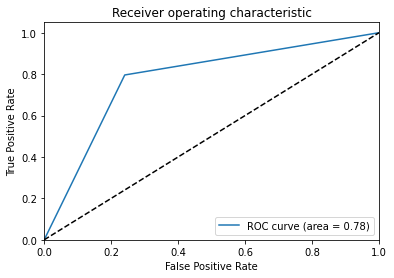

In [ ]:
from sklearn.metrics import roc_curve , auc
import matplotlib.pyplot as plt

# ROC curve and AUC
fpr, tpr , thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## **Using model for future prediction**

In [ ]:

x_new = ["The trip so bad such a worst experience"]


x_new_transformed = vectorizer.transform(x_new)


proba = classifier.predict_proba(x_new_transformed)


if proba[0, 0] > proba[0, 1]:
    print("Negative tweet")
else:
    print("Positive tweet")

Negative tweet


In [ ]:
from sklearn.svm import SVC

model = SVC()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [ ]:
pwd

'C:\\Users\\GANESH\\Mongodb practice'